In [1]:
import tensorflow as tf
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# TODO: get some actual out-of-sample images where I can be basically sure that it's not in the data set.
path_to_image_files = ['data/test/1B6-1p2b3-p3k3-P2p2p1-1P1Pn3-1K1N3P-6P1-8.png', 'test.png']
images = []
for path_to_image_file in path_to_image_files:
    image = tf.image.decode_png(tf.read_file(path_to_image_file), channels=1)
    image = tf.reshape(image, [100, 100, 1])
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.multiply(tf.subtract(image, 0.5), 2)
#    image = tf.image.resize_images(image, [54, 54])
    images.append(image)
images = tf.stack(images)

In [4]:
pieces_logits = Model.inference(images, drop_rate=0.0)
pieces_predictions = tf.argmax(pieces_logits, axis=2)
pieces_predictions_string = tf.reduce_join(tf.as_string(pieces_predictions), axis=0)

In [5]:
pieces_logits

<tf.Tensor 'stack_2:0' shape=(2, 64, 13) dtype=float32>

In [6]:
sess = tf.InteractiveSession()

In [7]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

INFO:tensorflow:Restoring parameters from logs/train/latest.ckpt


In [8]:
pieces_predictions_val, pieces_predictions_string_val, images_val = sess.run([pieces_predictions, pieces_predictions_string, images])
images_val = (images_val / 2.0) + 0.5

In [35]:
def board(arr):
    labels = { 'k': 1, 'q': 2, 'r': 3, 'b': 4, 'n': 5, 'p': 6, 'K': 7, 'Q': 8, 'R': 9, 'B': 10, 'N': 11, 'P': 12, 'X': 0 }
    labels = {v: k for k, v in labels.iteritems()}

    xs = [labels[l] for l in arr]
    s = ""
    for i in range(len(xs)):
        if i % 8 == 0:
            print "".join(list(reversed(list(s))))
            s = ""
        s += xs[i]
    print s

In [42]:
board(pieces_predictions_val[0])


XBXXXXXX
XpXXbXXX
pXXXkXXX
PXXpXXpX
XPXPnXXX
XKXNXXXP
XXXXXXPX
XXXXXXXX


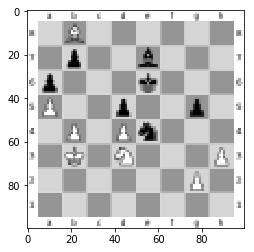

In [43]:
imshow(images_val[0].squeeze(), cmap="gray")

TypeError: Invalid dimensions for image data

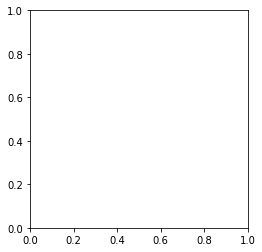

In [7]:
idx = 0
image_val = images_val[idx]
pieces_prediction_string_val = pieces_predictions_string_val[idx]
imshow(images_val[idx])
print 'length: %d' % length_prediction_val
print 'pieces: %s' % pieces_prediction_string_val

In [10]:
sess.close()